<a href="https://colab.research.google.com/github/ravindrabharathi/Project1/blob/master/Rgroup2/Oct4_Ravindra_EVA_research_grp2_distort_mid_lower_layers_DavidNet_70epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effect of distortions/transformations in mid/lower layers of a Convolutional Neural Network

This exercise is to find out of there is any beneficial effect due to  performing distortions/transformation on the activation outputs of mid/lower layers (similar to augmenations on input images ) of a convolutional Neural Network . We will look at gain in test accuracy , regularization effects as seen in smaller gaps of train vs test accuracy , etc. Here we are using a reference model loosely based on the one defined by David Page in his DawnBench submission and explained very well in his series of blog posts (insert link here) . The Model is essentially a 3 block , nine layer modified Resnet Model .

We will compare the accuracies achieved using the following methods 

1. Base Model with image augmnetation on input images alone 
2. Base Model without input image augmenation but with distortions after first resnet block 
3. Base Model without input image augmenation but with distortions after second resnet block 
4. Base Model without input image augmenation but with distortions after first and second resnet blocks 
5. Base Model with input image augmenation and with distortions after first resnet block 
6. Base Model without input image augmenation and with distortions after second resnet block 

Augmentations for input images as well as activation channels will be a combination of pad/random_crop , flip_left_right and cutout 

### install/import tensorflow_addons

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow==2.0
!pip install tensorflow-gpu==2.0
!pip install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa
import math
import random

     |████████████████████████████████| 86.3MB 1.5MB/s 
     |████████████████████████████████| 3.8MB 39.3MB/s 
     |████████████████████████████████| 450kB 33.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f78eb4240ce5c6124caf020fa17f441c0cb3d0ca0c962f2cc00f1b7a58748e87
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
     |█

### Install tf_utils

In [2]:
!pip install --upgrade git+https://github.com/ravindrabharathi/tf_utils 

  Cloning https://github.com/ravindrabharathi/tf_utils to /tmp/pip-req-build-ln2mzan5
  Running command git clone -q https://github.com/ravindrabharathi/tf_utils /tmp/pip-req-build-ln2mzan5
  Created wheel for tf-utils: filename=tf_utils-0.2-cp36-none-any.whl size=8945 sha256=0123ceb366e336b9fda76f3b990ac7717cc0aee96a775950e9d21b26f1dc5917
  Stored in directory: /tmp/pip-ephem-wheel-cache-5_5_0vlr/wheels/95/af/bb/690b94c65a5aad47a5c39e75f158a2b043448e908c5c121791
Successfully built tf-utils


### import the data module

In [3]:
import tf_utils.data as ds

Finished 'get_cpu_num' in 0.0000 secs


### set batch size

In [0]:
batch_size=512
ds.batch_size=batch_size
EPOCHS=70

### downlaod data and create tf records

In [5]:
ds.get_cifar10_and_create_tfrecords()


Finished 'download_file' in 6.7089 secs
Finished 'download_cifar10_files' in 6.7096 secs
Done
Finished 'extract_cifar10_files' in 1.9317 secs
Finished '_get_file_names' in 0.0000 secs
Generating ./train.tfrecords
Finished 'read_pickle_from_file' in 0.1546 secs
Finished 'read_pickle_from_file' in 0.1450 secs
Finished 'read_pickle_from_file' in 0.1398 secs
Finished 'read_pickle_from_file' in 0.1420 secs
Finished 'read_pickle_from_file' in 0.1383 secs
Finished 'convert_to_tfrecord' in 3.1647 secs
Done!
Generating ./eval.tfrecords
Finished 'read_pickle_from_file' in 0.1434 secs
Finished 'convert_to_tfrecord' in 0.6154 secs
Done!
Finished 'create_tf_records' in 3.7823 secs
Finished 'get_cifar10_and_create_tfrecords' in 12.4244 secs


### create train and test dataset

In [6]:
def aug_fn(image):
  return ds.cutout(ds.flip_left_right(ds.random_pad_crop(image)))

train_ds1=ds.get_train_ds(batch_size=batch_size,shuffle=True,distort=True,distort_fn=aug_fn)
train_ds2=ds.get_train_ds(batch_size=batch_size,shuffle=True,distort=False)

test_ds=ds.get_eval_ds(batch_size=batch_size)

distorting...
Finished 'get_tf_dataset_2' in 2.8474 secs
Finished 'get_tf_dataset_in_batches' in 2.8480 secs
Finished 'get_train_ds' in 2.8481 secs
Finished 'get_tf_dataset' in 0.1671 secs
Finished 'get_tf_dataset_in_batches' in 0.1672 secs
Finished 'get_train_ds' in 0.1676 secs
Finished 'get_tf_dataset' in 0.0440 secs
Finished 'get_tf_dataset_in_batches' in 0.0442 secs
Finished 'get_eval_ds' in 0.0442 secs


### import visualization module

In [0]:
import tf_utils.visualize as vz

### plot images from train dataset1 , train dataset by default uses image augmenttation of cutout,flip-left-right,random-pad-crop 

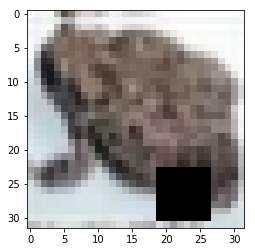

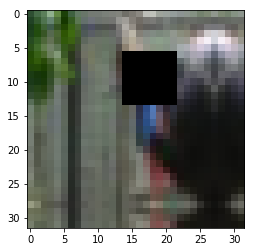

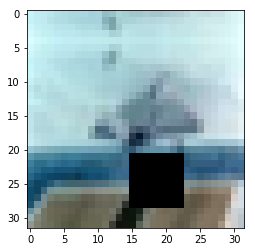

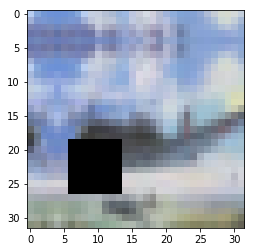

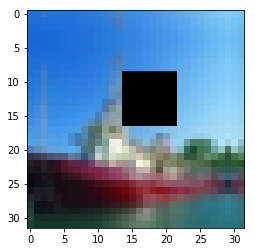

In [8]:
vz.plot_cifar10_files(train_ds1)

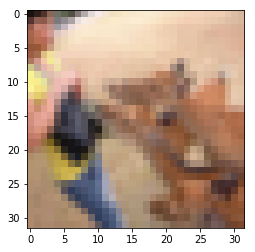

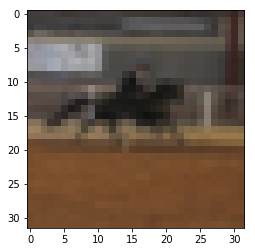

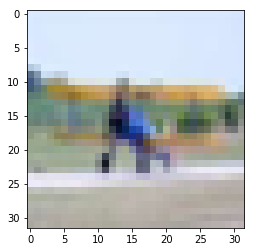

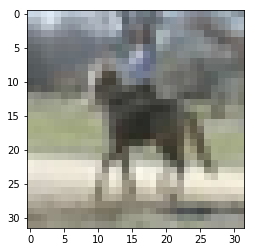

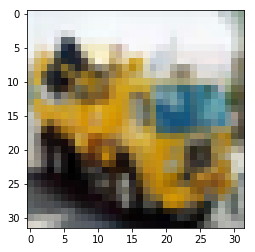

In [9]:
vz.plot_cifar10_files(train_ds2)

### Training - Build model , compile and train 

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D,  Activation, GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization , Dense, Lambda

from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import math
WEIGHT_DECAY=1.25e-4
reg=tf.keras.regularizers.l2(WEIGHT_DECAY)
def init_pytorch(shape, dtype=tf.float32, partition_info=None):
  fan = np.prod(shape[:-1])
  bound = 1 / math.sqrt(fan)
  return tf.random.uniform(shape, minval=-bound, maxval=bound, dtype=dtype)

def conv(inp,f=32,k=3):
  conv_layer=Conv2D(f,k,use_bias=False,padding='same',kernel_initializer=init_pytorch, kernel_regularizer=reg)(inp)
  conv_layer=BatchNormalization(momentum=0.9, epsilon=1e-5)(conv_layer)
  conv_layer=Activation('relu')(conv_layer)
  return conv_layer
def resBlk(inp,f=32,k=3,residual=True) :
  res1=conv(inp,f,k)
  res1=MaxPooling2D(pool_size=(2,2))(res1)
  if residual:
    res2=conv(res1,f,k)
    res3=conv(res2,f,k)
    return res1+res3
  else:
    return res1  

def apply_weight(x):
  return x*0.125  

def random_pad_crop(image,padding=2):
  shp=tf.shape(image)
  
  image=tf.pad(image,[(0, 0), (padding, padding), (padding, padding), (0, 0)], mode='reflect')
  
  image=tf.image.random_crop(image,size=shp)
  return image  

def flip_left_right(image):
  return tf.image.random_flip_left_right(image)   

def aug_fn1(img):  
  return ds.cutout(ds.flip_left_right(ds.random_pad_crop(img,padding=2)),90,size=4)

def aug_fn2(img):
  return ds.cutout(ds.flip_left_right(ds.random_pad_crop(img,padding=1)),90,size=2)
  

def aug1(image):
  print('is_training',is_training)
  if is_training:
    
    #return tf.map_fn(lambda img: aug_fn1(img),image,parallel_iterations=ds.CPU_CORES,back_prop=is_training) 
    return tf.map_fn(lambda img: aug_fn1(img) ,image,parallel_iterations=10*ds.CPU_CORES,back_prop=is_training)    
  else:
    print('inside validation cycle\n===============\n')
    return image  

def aug2(image):
  
  print('is_training',is_training)
  if is_training:
    
    return tf.map_fn(lambda img: aug_fn2(img) ,image,parallel_iterations=10*ds.CPU_CORES,back_prop=is_training)
  else:
    print('inside validation cycle\n===============\n')
    return image        

In [0]:
def build_model(distort_param=0):
  f=64
  inp=Input(shape=(32,32,3))
  layer1=conv(inp,f,3)
  res1=resBlk(layer1,f*2,3)
  if (distort_param in [1,3,4]):
    res1=Lambda(aug1)(res1)
  res2=resBlk(res1,f*4,3,False)
  if (distort_param in [2,3,5]):
    res2=Lambda(aug2)(res2)
  res3=resBlk(res2,f*8,3)
  
  layer2=GlobalMaxPooling2D()(res3)
  layer3=Dense(10, kernel_initializer=init_pytorch, use_bias=False,kernel_regularizer=reg)(layer2)
  layer4=Lambda(lambda x: x*0.125)(layer3)
  out=Activation('softmax')(layer4)
  model=Model(inputs=[inp],outputs=[out])
  model.summary()
  return model 

In [0]:

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule():
    
    def schedule(epoch):

      lr=lr1=np.interp([epoch],[0, EPOCHS//5,EPOCHS], [0.025, 0.4, 0])[0]
      print('epoch ', epoch+1, ': setting learning rate to ',lr1)
      return lr
    
    return LearningRateScheduler(schedule)

lr_sched = lr_schedule()


In [0]:

for model_params in [0,5,4]:
  is_training=True
  #global_step = tf.train.get_or_create_global_step()
  model=model=build_model(model_params)
  opt=SGD(lr=0.025,momentum=0.9,nesterov=True)
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,metrics=['accuracy']
              )
  batch_size=512
  
  if model_params in [0,4,5]:
    train_ds=train_ds1
    print('Model will be trained with image augmentation input layer\n====================')
    if model_params==4:
      print('Model will also include distortion after Res Blk 1\n=======================')
    elif model_params==5:
      print('Model will also include distortion after Res Blk 2\n=======================')
      
  else:
    if model_params==1:
      print('Model will be trained with distortion after Res Blk 1\n=======================')
    elif model_params==2:
      print('Model will be trained with distortion after Res Blk 2\n=======================')
    elif model_params==3:
      print('Model will be trained with distortion after Res Blk 1 and Res Blk 2\n=======================')    
    train_ds=train_ds2  
  model.fit(train_ds,epochs=EPOCHS, steps_per_epoch=np.ceil(50000/batch_size), 
          callbacks=[lr_sched],
          verbose=1)
  is_training=False
  score=model.evaluate(test_ds, steps =np.ceil(10000/batch_size), verbose=1)

  del(model)
  del(train_ds)
  
  print('val accuracy score at the end of training model type ',model_params, score)
  print("=========================================\n")

#validation_data=test_ds, validation_steps=np.ceil(10000/batch_size),

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Run time disconnected , so run the interrupted tests once again

In [13]:

for model_params in [5,4]:
  is_training=True
  #global_step = tf.train.get_or_create_global_step()
  model=model=build_model(model_params)
  opt=SGD(lr=0.025,momentum=0.9,nesterov=True)
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,metrics=['accuracy']
              )
  batch_size=512
  
  if model_params in [0,4,5]:
    train_ds=train_ds1
    print('Model will be trained with image augmentation input layer\n====================')
    if model_params==4:
      print('Model will also include distortion after Res Blk 1\n=======================')
    elif model_params==5:
      print('Model will also include distortion after Res Blk 2\n=======================')
      
  else:
    if model_params==1:
      print('Model will be trained with distortion after Res Blk 1\n=======================')
    elif model_params==2:
      print('Model will be trained with distortion after Res Blk 2\n=======================')
    elif model_params==3:
      print('Model will be trained with distortion after Res Blk 1 and Res Blk 2\n=======================')    
    train_ds=train_ds2  
  model.fit(train_ds,epochs=EPOCHS, steps_per_epoch=np.ceil(50000/batch_size), 
          callbacks=[lr_sched],
          verbose=1)
  is_training=False
  score=model.evaluate(test_ds, steps =np.ceil(10000/batch_size), verbose=1)

  del(model)
  del(train_ds)
  
  print('val accuracy score at the end of training model type ',model_params, score)
  print("=========================================\n")

#validation_data=test_ds, validation_steps=np.ceil(10000/batch_size),

is_training True
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
_____________________________________________________________________________

### Summary of Test Results 
Hyperparameters : Epochs:70, max_lr:0.4, momentum:0.9, L2-wt_decay on Conv Layers :1.25e-4 , Batch_size=512 

| Trial | Augmentation strategy | Train accuracy |Test Accuracy | Hyperparameters |Comments |
| :--- | :---: | :---: | :---: | :---: | :--- |
| 1 | cutout(flip_lr(pad4_random_crop(inp_image),8)  |99.74  | 94.73 | as above | train-test acc gap 4.88 |
| 2 | cutout(flip_lr(pad2_random_crop(res_blk1),4)  |-  | - | " | Did not run this test |
| 3 | cutout(flip_lr(pad1_random_crop(res_blk2),2) | - | - | " | Did not run this test |
| 4 | augmentation of trial 2 + augmentation of trial 3  | -  | - | " | Did not run this test |
| 5 | augmentations of trial 1 + augmentation of trial 2  | 99.24  | **94.91** |"| train-test acc gap 4.33 |
| 6 | augmentations of trial 1 + augmentation of trial 3  | 99.24 | 94.50 |"|  Train-Test acc gap : 4.74 |

**Distortion of mid/lower layer activation channels, when used in combination with usual Image augmentation , seems to improve Regularization and perhaps we could explore this option for a larger number of epochs. Training for 70 epochs , image-augmentation plus distortion of channels after ResBlk 1 gave 94.91 val accuracy which is more than Val accuracy obtained with Image augmentation alone . But since the tests were interrupted and started again , we need to check if this happens consistently over several trials and also over larger number of epochs**